# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

btc_data=requests.get(btc_url)
#btc_content = btc_data.content
btc=btc_data.json()
#print(json.dumps(btc,indent=4))
# Fetch current ETH price

eth_data=requests.get(eth_url)
#eth_content = eth_data.content
eth=eth_data.json()
#print(json.dumps(eth,indent=4))

# Compute current value crpto
current_btc_value= btc['data']["1"]["quotes"]["USD"]["price"]
my_btc_value= current_btc_value * my_btc
#print(my_btc_value)

current_eth_value= eth['data']["1027"]["quotes"]["USD"]["price"]
my_eth_value= current_eth_value * my_eth
#print(my_eth_value)
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43719.60
The current value of your 5.3 ETH is $12815.13


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Format current date as ISO format
today = pd.Timestamp("2022-01-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
).df


# Preview DataFrame
df_portfolio.tail()

AGG                                      \
                               open    high     low   close      volume   
time                                                                      
2022-01-18 00:00:00-05:00  111.8100  111.86  111.47  111.49   7390142.0   
2022-01-19 00:00:00-05:00  111.7000  111.89  111.65  111.71   7641972.0   
2022-01-20 00:00:00-05:00  111.8400  111.90  111.75  111.79   6861797.0   
2022-01-21 00:00:00-05:00  112.1900  112.35  112.11  112.24   7792653.0   
2022-01-24 00:00:00-05:00  112.3814  112.42  112.10  112.12  10666672.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2022-01-18 00:00:00-05:00  459.73  459.9600  455.31  456.53   95565773.0  
2022-01-19 00:00:00-05:00  458.17  459.6124  451.46  451.79   95311817.0  
2022-01-20 00:00:00-05:00  453.75  458.7400  444.50  446.79  105009751.0  
2022-01-21 00:00:00-05:00  445.56  448.0600  437.97  438.11  174541929.0  
2022-01-24 00:00:00-05:00  432.03  440.3800  420.76  439.88  233026938.0

In [8]:
# Pick AGG and SPY close prices
agg_close_price=df_portfolio['AGG']['close'][999]
spy_close_price=df_portfolio['SPY']['close'][999]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.24
Current SPY closing price: $438.11


In [9]:
# Compute the current value of shares
my_spy_value=spy_close_price * my_spy 
my_agg_value=agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21905.50
The current value of your 200 AGG shares is $22448.00


### Savings Health Analysis

In [10]:
# Set monthly household income
monthly_income= 12000

# Consolidate financial assets data
total_crypto=my_btc_value+my_eth_value
total_shares=my_spy_value+my_agg_value
totals=[total_crypto,total_shares]
totals
# Create savings DataFrame
df_savings = pd.DataFrame(totals, index=['crypto','shares'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,56534.735
shares,44353.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

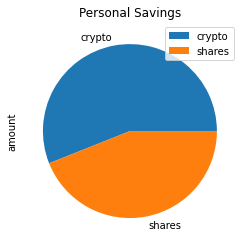

In [11]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title="Personal Savings")

In [12]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=total_crypto+total_shares

# Validate saving here
if(total_savings>emergency_fund):
    print("Congratulations. You have enough money in this fund.")
elif(total_savings==emergency_fund):
    print("Congratulations. You've reached your financial goal.")
else:
    difference=emergency_fund-total_savings
    print("You are ${difference} from your financial goal.")
    
    

Congratulations. You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [13]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-24', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
start_date = pd.Timestamp('2017-01-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-24', tz='America/New_York').isoformat()

# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data=alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995  273.47   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931  259.99   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626  268.50   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275  267.97   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.70  106.760  5603974  260.80   

                                                              
                             high     low   close     volume  
time                                                          
2018-02-05 00:00:00-05:00  275.85  263.31  264.18  205971586  
2018-02-06 00:00:00-05:00  269.70  254.12  269.18  232359323  
2018-02-07 00:00:00-05:00  272.36  267.63  267.66  112819262  
2018-02-08 00:00:00-05:00  268.17  257.59  257.72  156654099  
2018-02-09 00:00:00-05:00  263.61  252.92  261.67  207357854

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [27]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.70  106.760  5603974   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-05 00:00:00-05:00          NaN  273.47  275.85  263.31  264.18   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.70  254.12  269.18   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   
2018-02-08 00:00:00-05:00    -0.001541  267.97  268.17  257.59  257.72   
2018-02-09 00:00:00-05:00    -0.001496  260.80  263.61  252.92  261.67   

                                                   
                              volume daily_return  
time                                               
2018-02-05 00:00:00-05:00  205971586          NaN  
2018-02-06 00:00:00-05:00  232359323     0.018926  
2018-02-07 00:00:00-05:00  112819262    -0.005647  
2018-02-08 00:00:00-05:00  156654099    -0.037137  
2018-02-09 00:00:00-05:00  207357854     0.015327

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sprin\Desktop\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006709,1.001556,1.005018,0.992731,0.995797,1.003868,1.001001,0.997421,1.011500,0.996840,...,0.999774,0.999601,0.994358,1.001944,0.992833,0.993845,0.997660,0.991206,0.995167,0.990467
2,0.999031,1.009202,1.014862,0.989282,1.004560,1.013376,0.982051,0.998143,1.025017,1.019140,...,0.984167,0.997502,0.989703,1.002360,1.000888,0.998371,0.981204,0.976672,0.993900,0.984196
3,1.002495,1.013181,1.017776,0.992802,1.010372,1.022415,0.972580,0.993104,1.029713,0.994018,...,0.991520,1.008653,0.983508,1.011031,1.009280,1.001140,0.984581,0.984615,0.991179,0.991780
4,1.006283,1.012520,1.015043,0.998299,0.991570,1.013949,0.985062,0.994942,1.039351,1.000903,...,1.005649,1.013401,0.985050,1.021844,1.014745,0.992355,0.986980,0.978345,0.991727,0.991295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.861817,8.370001,11.893368,15.942513,6.485290,21.717020,11.405987,10.391282,55.246997,19.413355,...,37.587299,8.264340,17.132003,25.415571,27.218274,12.116161,16.793781,21.630941,11.485518,15.011231
7557,15.837367,8.402167,11.965668,15.998911,6.482307,21.966063,11.364642,10.442519,54.668725,19.363085,...,37.625903,8.163592,17.045159,25.462936,27.250033,11.935952,16.664585,21.499774,11.481292,15.027978
7558,15.719599,8.418203,11.771342,16.124026,6.456998,22.210875,11.370307,10.487759,54.254614,19.159430,...,37.772979,8.144105,17.004634,25.581101,27.091344,11.953580,16.495017,21.347022,11.463604,15.023728
7559,15.526046,8.428068,11.603163,16.134457,6.481035,21.926802,11.290832,10.652138,54.907263,19.119278,...,37.722044,8.133866,17.181251,25.463080,27.140021,11.896426,16.707257,21.493118,11.477900,15.105031


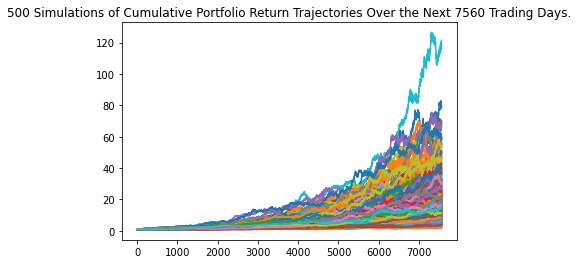

In [29]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

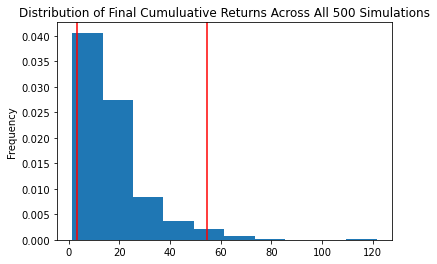

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             17.414630
std              13.380045
min               1.367958
25%               8.827752
50%              13.643639
75%              21.318621
max             121.439623
95% CI Lower      3.393403
95% CI Upper     54.722503
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $67868.05 and $1094450.06


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $101802.08 and $1641675.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")